In [16]:
import torch, os
import pandas as pd
import multiprocessing
from PIL import Image

In [17]:
infer = pd.read_csv('output/output.csv')

In [18]:
decode = []
for i in infer['ans']:
    decode.append(MaskBaseDataset.decode_multi_class(i))
infer['decode'] = decode

In [22]:
infer

,ImageID,ans,decode,mask,gender,age
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,14,"(2, 0, 2)",normal,male,old
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,2,"(0, 0, 2)",mask,male,old
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,16,"(2, 1, 1)",normal,female,middle
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,14,"(2, 0, 2)",normal,male,old
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,12,"(2, 0, 0)",normal,male,young
...,...,...,...,...,...,...
12595,d71d4570505d6af8f777690e63edfa8d85ea4476.jpg,1,"(0, 0, 1)",mask,male,middle
12596,6cf1300e8e218716728d5820c0bab553306c2cfd.jpg,5,"(0, 1, 2)",mask,female,old
12597,8140edbba31c3a824e817e6d5fb95343199e2387.jpg,9,"(1, 1, 0)",incorrect,female,young
12598,030d439efe6fb5a7bafda45a393fc19f2bf57f54.jpg,4,"(0, 1, 1)",mask,female,middle


In [20]:
mask = []
gender = []
age = []
for i in infer['decode']:
    m, g, a = i
    if m == 0:
        mask.append('mask')
    elif m == 1:
        mask.append('incorrect')
    elif m == 2:
        mask.append('normal')
    if g == 0:
        gender.append('male')
    elif g == 1:
        gender.append('female')
    if a == 0:
        age.append('young')
    elif a == 1:
        age.append('middle')
    elif a == 2:
        age.append('old')

In [23]:
infer['mask'] = mask
infer['gender'] = gender
infer['age'] = age

In [24]:
infer

,ImageID,ans,decode,mask,gender,age
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,14,"(2, 0, 2)",normal,male,old
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,2,"(0, 0, 2)",mask,male,old
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,16,"(2, 1, 1)",normal,female,middle
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,14,"(2, 0, 2)",normal,male,old
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,12,"(2, 0, 0)",normal,male,young
...,...,...,...,...,...,...
12595,d71d4570505d6af8f777690e63edfa8d85ea4476.jpg,1,"(0, 0, 1)",mask,male,middle
12596,6cf1300e8e218716728d5820c0bab553306c2cfd.jpg,5,"(0, 1, 2)",mask,female,old
12597,8140edbba31c3a824e817e6d5fb95343199e2387.jpg,9,"(1, 1, 0)",incorrect,female,young
12598,030d439efe6fb5a7bafda45a393fc19f2bf57f54.jpg,4,"(0, 1, 1)",mask,female,middle


In [25]:
import matplotlib.pyplot as plt
from IPython.display import clear_output 

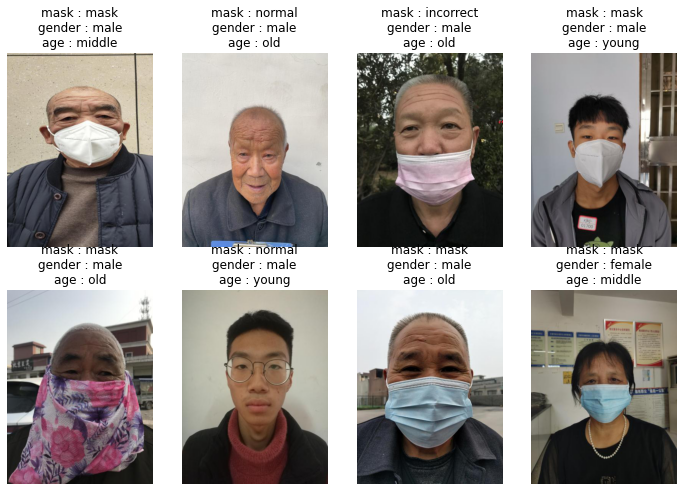

continue? :(1 for pass, 0 for stop) : 0


In [26]:
plt.figure(figsize = (12, 8))
for i in range(len(infer)):
    path, _, _, m, g, a = (infer.iloc[i,:])
    img = Image.open(os.path.join(img_root, path))
    plt.subplot(2, 4, i % 8 + 1)
    plt.imshow(img)
    plt.title(f'mask : {m}\ngender : {g}\nage : {a}')
    plt.axis('off')
    if i % 8 + 1 == 8:
        plt.show()
        cont = input('continue? :(1 for pass, 0 for stop) :')
        if cont == '1':
            clear_output()
            plt.figure(figsize = (12, 8))
        elif cont == '0':
            break


In [ ]:
age -> MSE

In [ ]:
18~60

55

18~y
60 -> 55

Asian aging model -> normal.jpg age 4500

In [ ]:
!!!age에 대한 labeling!!!

train valid
1. mask classification model 만들기
2. mask를 쓴 사람들 대상으로 aging model 만들기
3. mask를 안 쓴 사람들 대상으로 aging model 만들기

test
1. image -> mask classification -> incorrect or mask -> mask를 쓴 사람들 대상으로 만든 aging model에서 age 예측
                                -> normal -> mask를 안 쓴 사람들 대상으로 aging model에서 age 예측